In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 228 GB / percent used: 9.5 %


# Check model data

In [2]:
path = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-02'
path_guided = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-G-02'

folder = 'ATM'
var_LMDZ = 'ua'

In [3]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, plev: 17, time_counter: 192)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
  * plev                  (plev) float32 100000.0 92500.0 ... 2000.0 1000.0
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    ua                    (time_counter, plev, lat, lon) float32 ...
Attributes:
    name:                      histmthNMC
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2017-Oct-31 15:28:40 GMT
    uuid:                      91514e1e-8d18-4311-91ff-68d871f046dc
    LongName:                  LMDZOR configuration
    history:                   Wed Nov  1 17:10:54 2017: ncrcat -C --buffer_s...
    nco_openmp_thread_number:  1

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


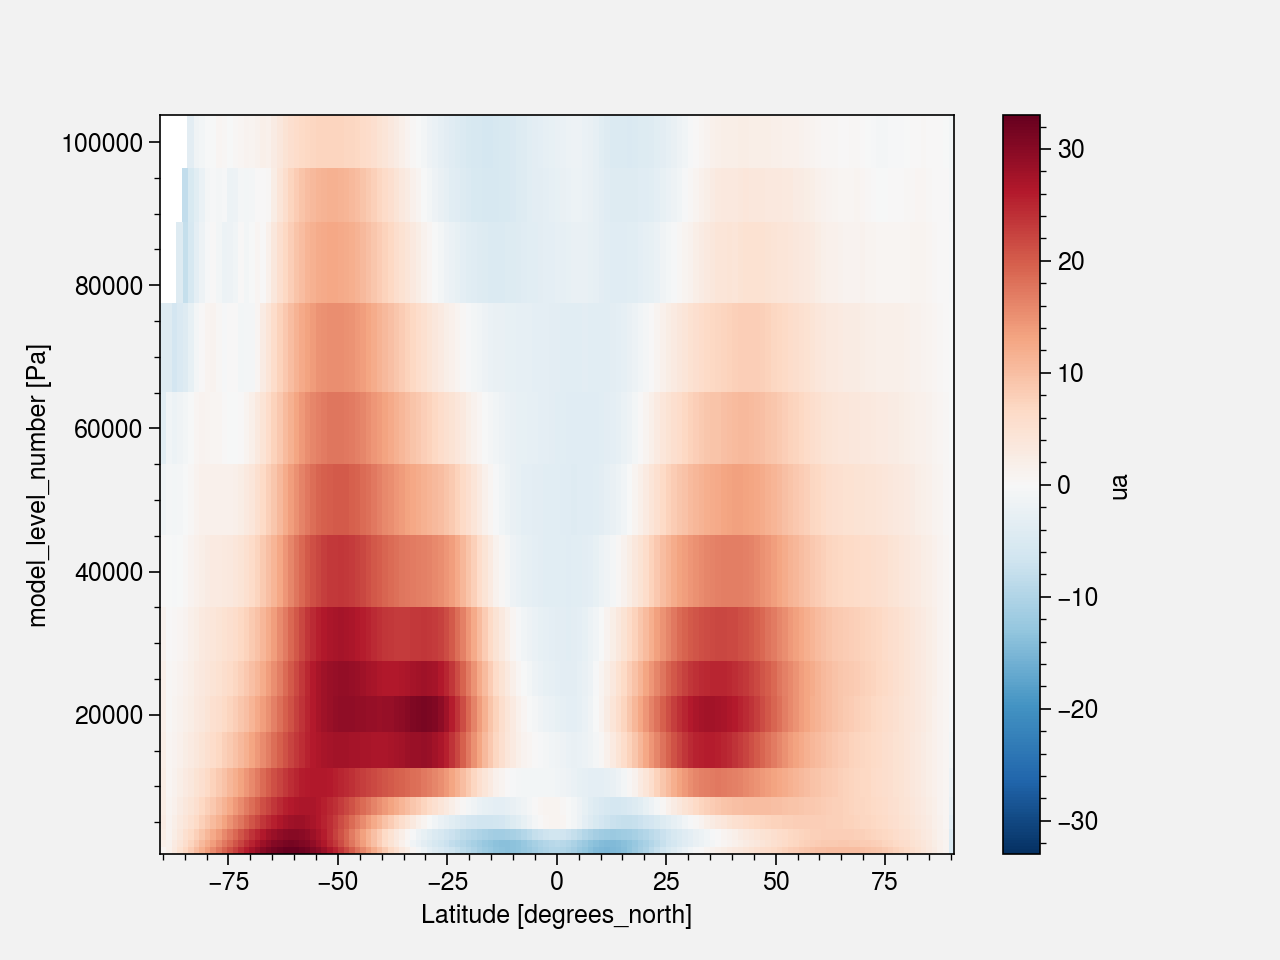

In [4]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').mean('lon').plot()

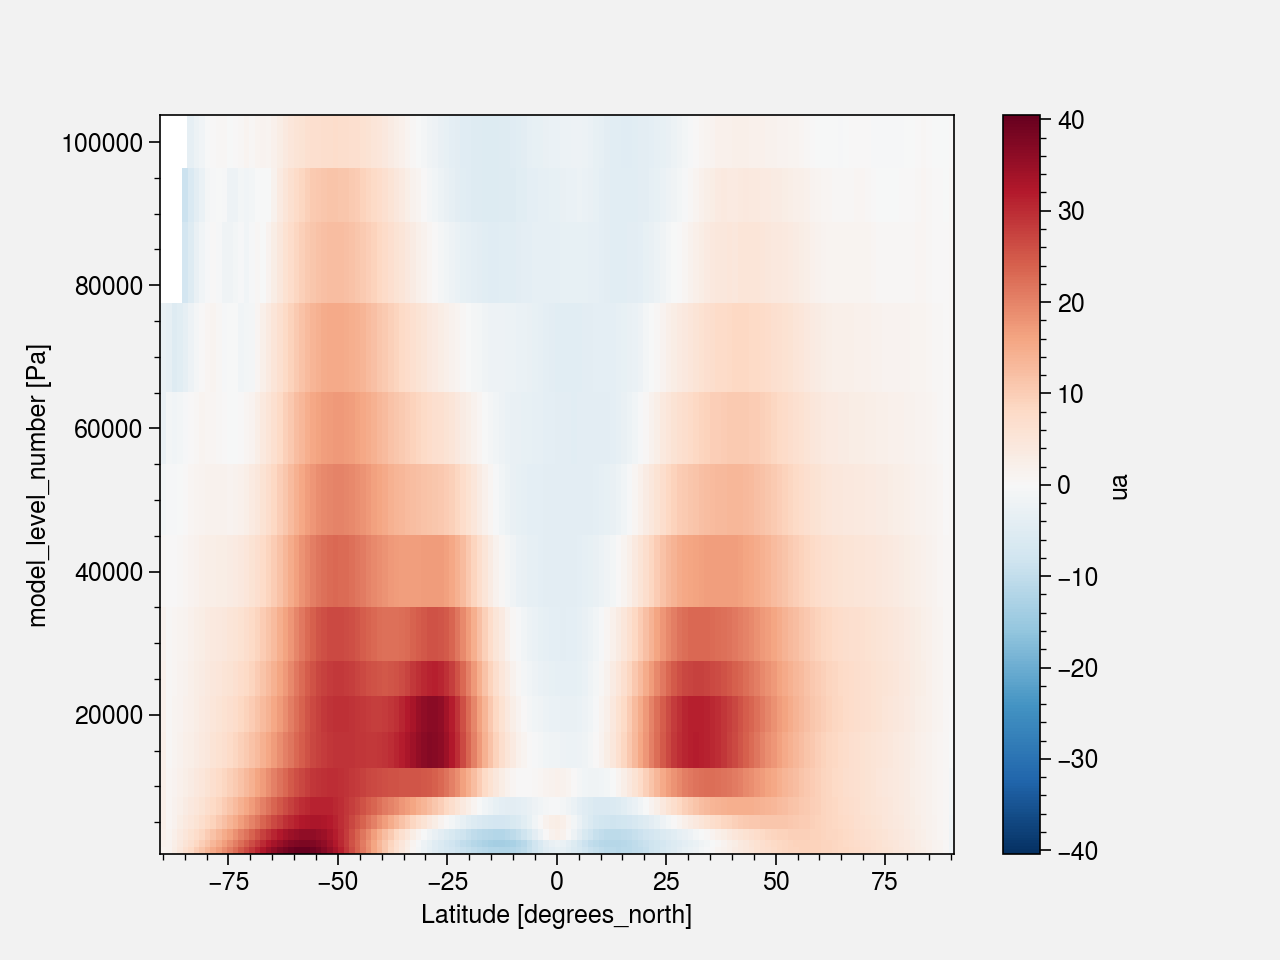

In [5]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').mean('lon').plot()

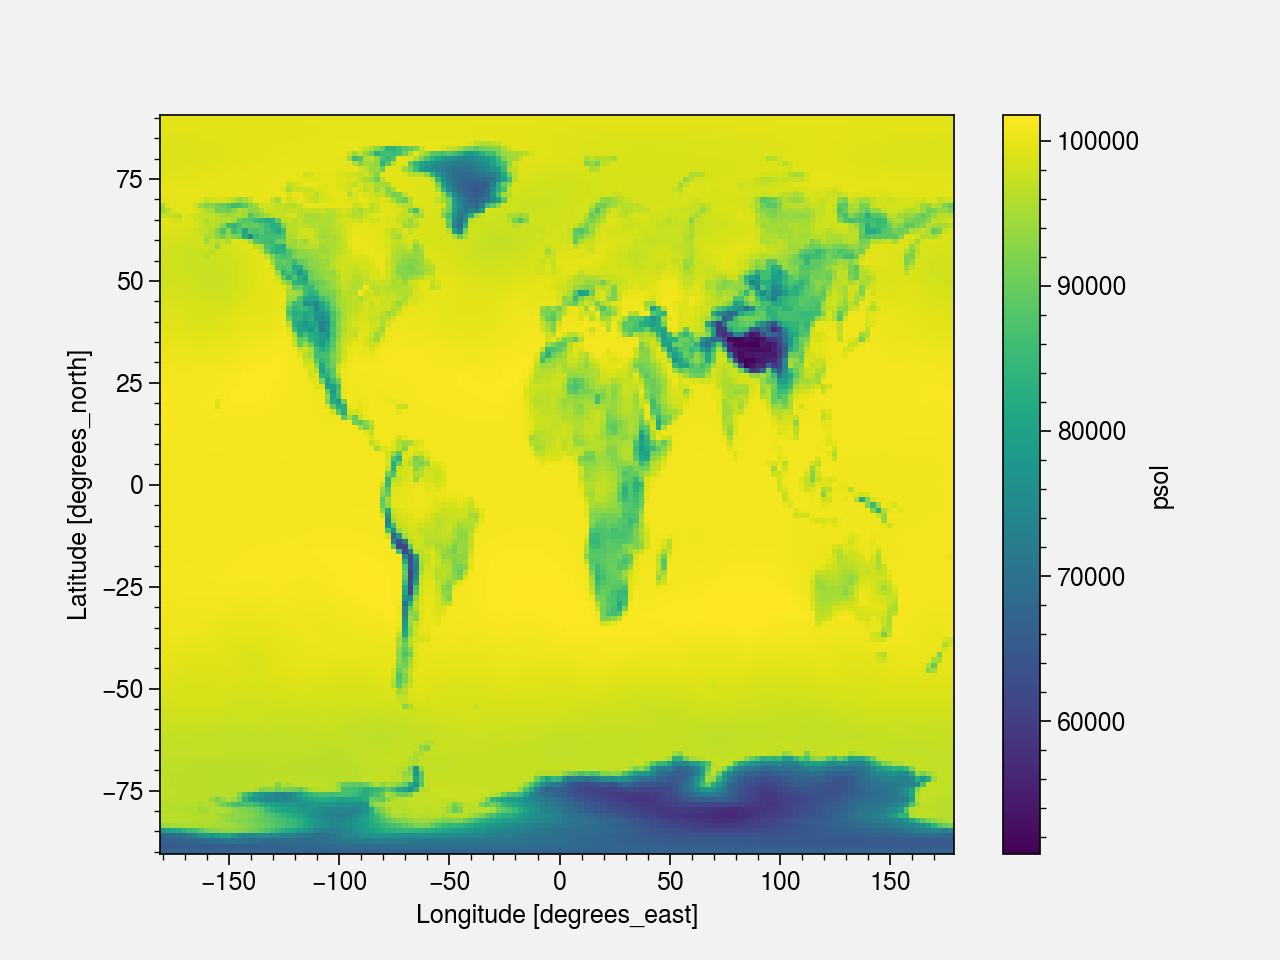

In [6]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_psol.nc')['psol'].min('time_counter').plot()

# Define period and zone

In [7]:
# Define common period
period = slice('1999','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'ua'
label = 'Eastward Wind'
units = 'm/s'
cmap='CoolWarm'
levels=plot.arange(-7,7,1)

# Get model data guided and not guided

In [8]:
model_guided = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_guided = model_guided.rename({'time_counter': 'time'})
model_guided.attrs['units'] = 'm/s'
model_guided

<xarray.DataArray 'ua' (time: 192, plev: 17, lat: 143, lon: 144)>
[67212288 values with dtype=float32]
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * plev           (plev) float32 100000.0 92500.0 85000.0 ... 2000.0 1000.0
    time_centered  (time) object ...
  * time           (time) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:           Eastward wind
    units:               m/s
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

In [9]:
model = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model = model.rename({'time_counter': 'time'})
model.attrs['units'] = 'm/s'
model

<xarray.DataArray 'ua' (time: 192, plev: 17, lat: 143, lon: 144)>
[67212288 values with dtype=float32]
Coordinates:
  * lat            (lat) float32 90.0 88.73239 87.46479 ... -88.73239 -90.0
  * lon            (lon) float32 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * plev           (plev) float32 100000.0 92500.0 85000.0 ... 2000.0 1000.0
    time_centered  (time) object ...
  * time           (time) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:           Eastward wind
    units:               m/s
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)

# Compute climatologies

In [10]:
calendar = model.time.encoding['calendar']
calendar

'noleap'

In [11]:
model_clim = u.clim(model, calendar=calendar)
model_guided_clim = u.clim(model_guided, calendar=calendar)

# Load min surface pressure for mask

In [12]:
ps_model_guided_min = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_psol.nc'
)['psol'].sel(time_counter=period).min('time_counter')

ps_model_min = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_psol.nc'
)['psol'].sel(time_counter=period).min('time_counter')

model_clim_masked = model_clim.where(model_clim.plev <= ps_model_min)
model_guided_clim_masked = model_guided_clim.where(model_guided_clim.plev <= ps_model_guided_min)

# Load obs
## ERA-Interim

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/ta-global.ipynb

In [13]:
obs_longname = 'ERA-Interim'
obs_name = 'ERA-Interim'

# hPa level: 37
obs = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/u.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).u.sel(time=period)

obs_clim = u.clim(obs, calendar='gregorian')

# Pa
ps_obs_min = xr.open_mfdataset(
    "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",combine='by_coords', parallel=True
).sp.sel(time=period).min('time')

 # Regrid towards model
regridder = xe.Regridder(obs_clim, model_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder(obs_clim)
ps_obs_min_regrid = regridder(ps_obs_min)

# Mask vertical values > ps
obs_clim_regrid_masked = obs_clim_regrid.where(obs_clim_regrid.level <= ps_obs_min_regrid/100)

# Regrid vertical
obs_clim_regrid_masked_v = obs_clim_regrid_masked.interp(level=(model_clim.plev.values/100), method='linear').load()

Reuse existing file: bilinear_241x480_143x144_peri.nc


# Plot differences

In [14]:
bias_global = []
clim_global = []

bias_HMA = []
clim_HMA = []

bias_global_without_HMA = []
clim_global_without_HMA = []


# Not guided
bias_global.append( (model_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_clim_masked - obs_clim_regrid_masked_v.values).where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_clim_masked.where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Guided
bias_global.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_guided_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_guided_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_guided_clim_masked.where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Difference
bias_global.append( bias_global[1] - bias_global[0] )
clim_global.append( clim_global[1] - clim_global[0] )

bias_HMA.append( bias_HMA[1] - bias_HMA[0] )
clim_HMA.append( clim_HMA[1] - clim_HMA[0] )

bias_global_without_HMA.append( bias_global_without_HMA[1] - bias_global_without_HMA[0] )
clim_global_without_HMA.append( clim_global_without_HMA[1] - clim_global_without_HMA[0] )


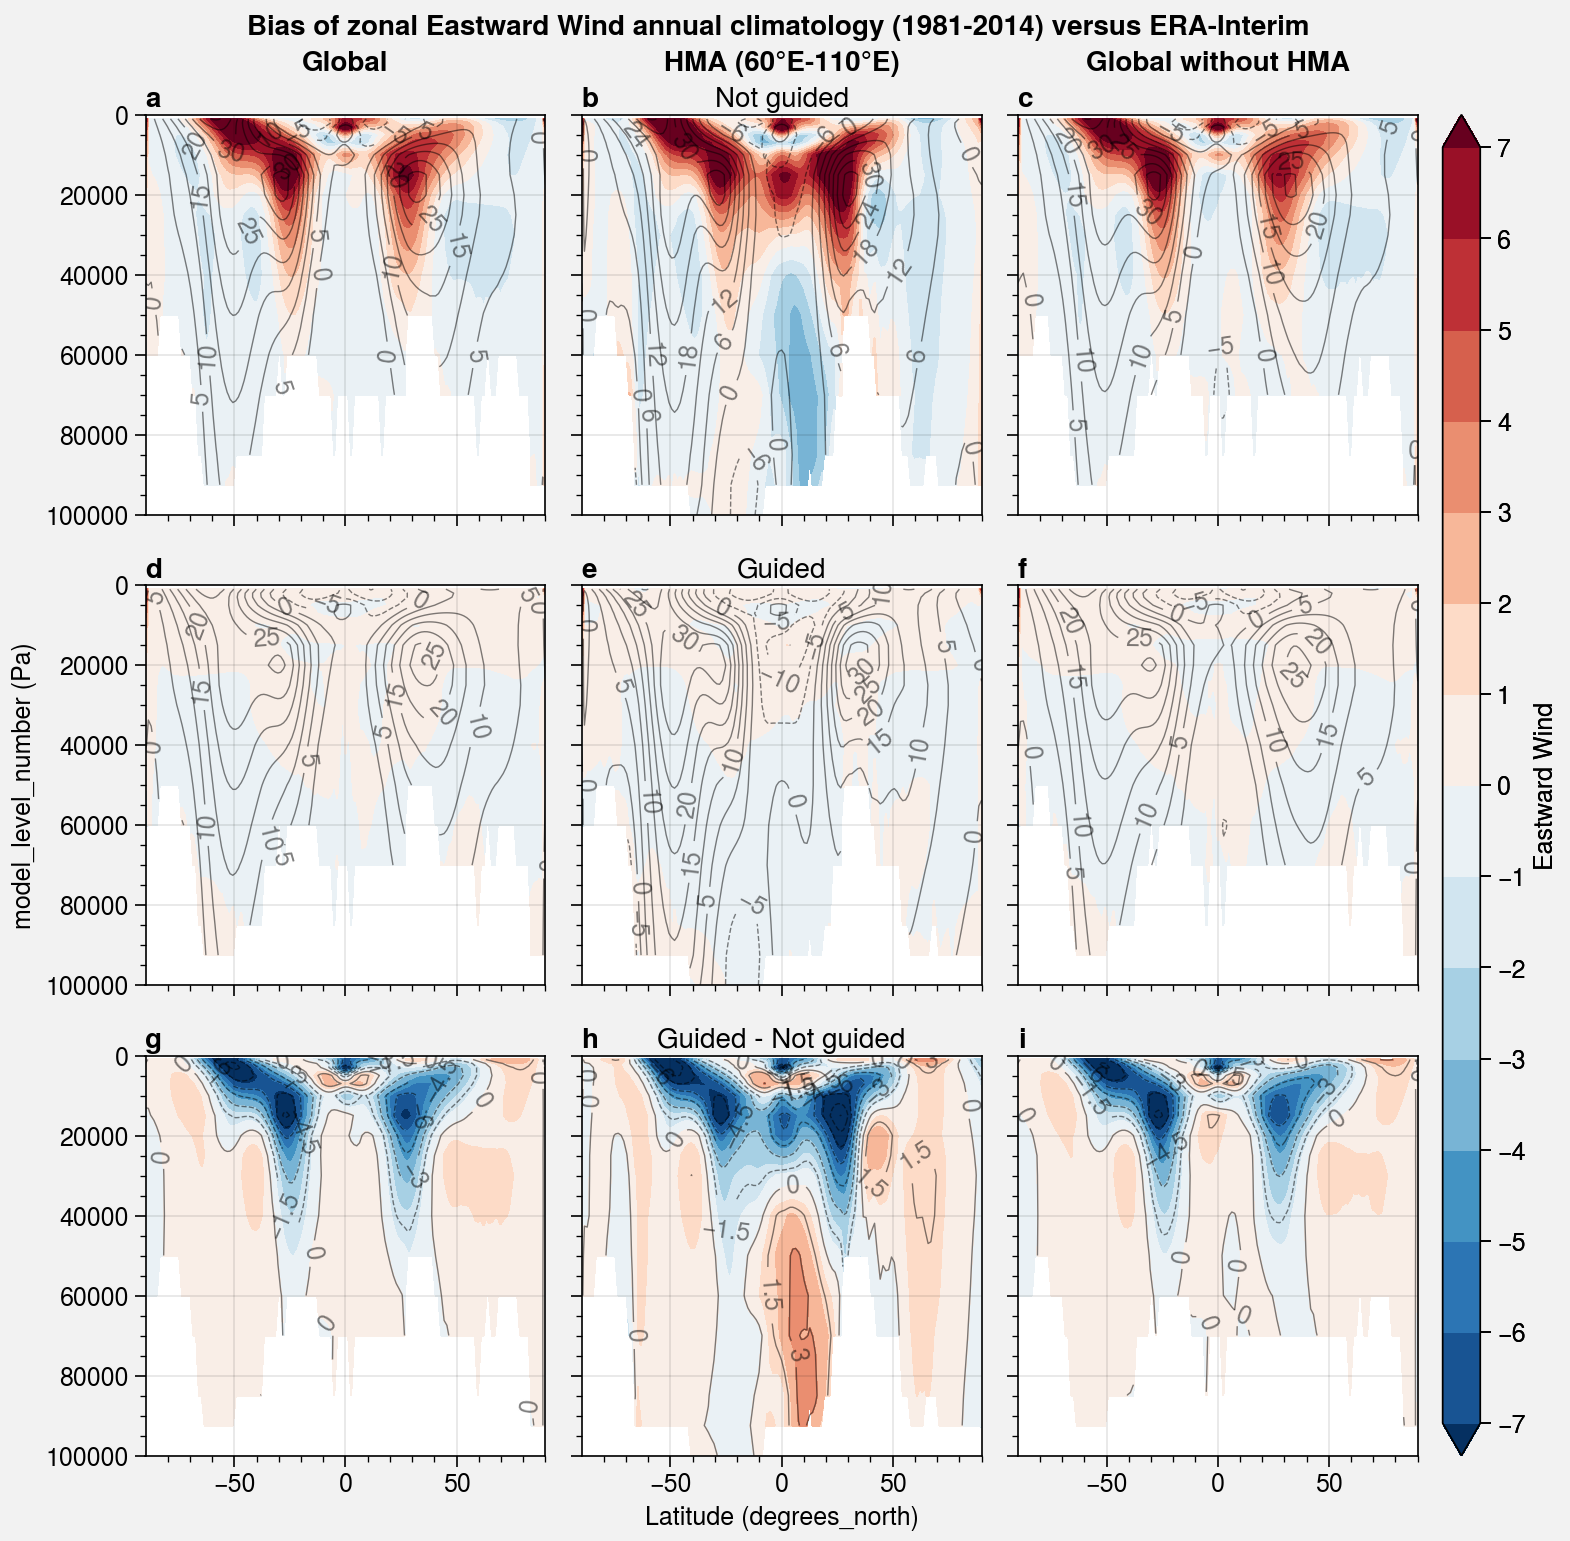

In [15]:
levels=plot.arange(-7,7,1)
extend='both'
cmap='BuRd'
ncols=3
lw=0.5
alpha=0.5
ylim=(100000,0)

f, axs = plot.subplots(ncols=ncols, nrows=3, axwidth=2)

list_models = ['Not guided', 'Guided', 'Guided - Not guided']

k=0
for i in range(0,3):
    # Model
    axs[k].contourf(bias_global[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

    # ERA-Interim
    axs[k].contourf(bias_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title=list_models[i])
    k += 1

    # Bias
    m = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1
    
    
f.colorbar(m, label=label, loc='r')   


axs.format(
    suptitle="Bias of zonal "+label+" annual climatology (1981-2014) versus ERA-Interim ",
    collabels=['Global', 'HMA (60°E-110°E)', 'Global without HMA'],
#     rowlabels=list_models,
    abc = True
)

f.save('img/'+var+'_zonal_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_zonal_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.pdf')